In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.shape

(200, 5)

In [6]:
dataset2 = dataset.drop(['CustomerID','Genre'], axis=1)

In [7]:
dataset2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
from sklearn.cluster import KMeans

In [9]:
X = dataset2.values

In [10]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

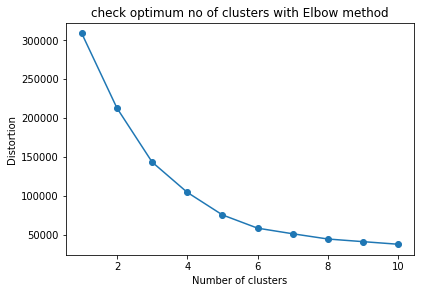

In [11]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.title("check optimum no of clusters with Elbow method")
plt.show()

In [12]:
KM5 = KMeans(n_clusters=5, random_state=42)

In [13]:
y_means = KM5.fit_predict(X)

In [14]:
KM6 = KMeans(n_clusters=6, random_state=42)

In [15]:
y_means6 = KM6.fit_predict(X)

In [16]:
# Visualising the clusters

from mpl_toolkits.mplot3d import Axes3D

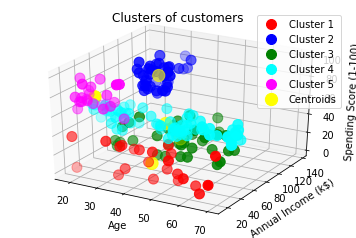

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_means == 0, 0], X[y_means == 0, 1], X[y_means == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_means == 1, 0], X[y_means == 1, 1], X[y_means == 1, 2],s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(X[y_means == 2, 0], X[y_means == 2, 1], X[y_means == 2, 2],s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(X[y_means == 3, 0], X[y_means == 3, 1], X[y_means == 3, 2],s = 100, c = 'cyan', label = 'Cluster 4')
ax.scatter(X[y_means == 4, 0], X[y_means == 4, 1], X[y_means == 4, 2],s = 100, c = 'magenta', label = 'Cluster 5')
ax.scatter(KM5.cluster_centers_[:, 0], KM5.cluster_centers_[:, 1], KM5.cluster_centers_[:, 2], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.legend()
plt.show()

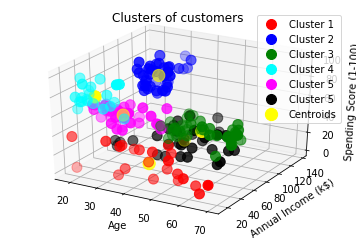

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_means6 == 0, 0], X[y_means6 == 0, 1], X[y_means6 == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_means6 == 1, 0], X[y_means6 == 1, 1], X[y_means6 == 1, 2],s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(X[y_means6 == 2, 0], X[y_means6 == 2, 1], X[y_means6 == 2, 2],s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(X[y_means6 == 3, 0], X[y_means6 == 3, 1], X[y_means6 == 3, 2],s = 100, c = 'cyan', label = 'Cluster 4')
ax.scatter(X[y_means6 == 4, 0], X[y_means6 == 4, 1], X[y_means6 == 4, 2],s = 100, c = 'magenta', label = 'Cluster 5')
ax.scatter(X[y_means6 == 5, 0], X[y_means6 == 5, 1], X[y_means6 == 5, 2],s = 100, c = 'black', label = 'Cluster 5')
ax.scatter(KM6.cluster_centers_[:, 0], KM6.cluster_centers_[:, 1], KM6.cluster_centers_[:, 2], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.legend()
plt.show()

In [19]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000
